### Importación de datos



In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [6]:
# Agregando Columna para identificar cada tienda.
tienda['tienda'] = 'tienda_1'
tienda2['tienda'] = 'tienda_2'
tienda3['tienda'] = 'tienda_3'
tienda4['tienda'] = 'tienda_4'

# Unimos todos en un solo DataFrame
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# AL imprimir verificamos cada columna de cada tienda y su estrucutura.Tambien resumen por tienda.

resumen_por_tienda = df_total.groupby('tienda').agg({'Producto':'count','Precio':'mean','Costo de envío':'mean','Calificación':'mean'}).reset_index()
resumen_por_tienda.columns = ['Tienda','Total de Productos Vendidos','Precio Promedio','Envío Promedio','Calificacíon Promedio']

# Mostrando tabla formateada.
from IPython.display import display
display(resumen_por_tienda.style.set_caption("Resumen por Tienda").format({'Precio Promedio':'${:,.2f}','Envío Promedio':'${:,.2f}','Calificacíon Promedio':'{:,.2f}'}))

,Tienda,Total de Productos Vendidos,Precio Promedio,Envío Promedio,Calificacíon Promedio
0,tienda_1,2359,"$487,867.91","$26,018.61",3.98
1,tienda_2,2359,"$473,227.43","$25,216.24",4.04
2,tienda_3,2359,"$465,459.77","$24,805.68",4.05
3,tienda_4,2358,"$440,362.89","$23,459.46",4.00


In [7]:
df_total.head()
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


,tienda,Precio
0,tienda_1,"$1,150,880,400.00"
1,tienda_2,"$1,116,343,500.00"
2,tienda_3,"$1,098,019,600.00"
3,tienda_4,"$1,038,375,700.00"


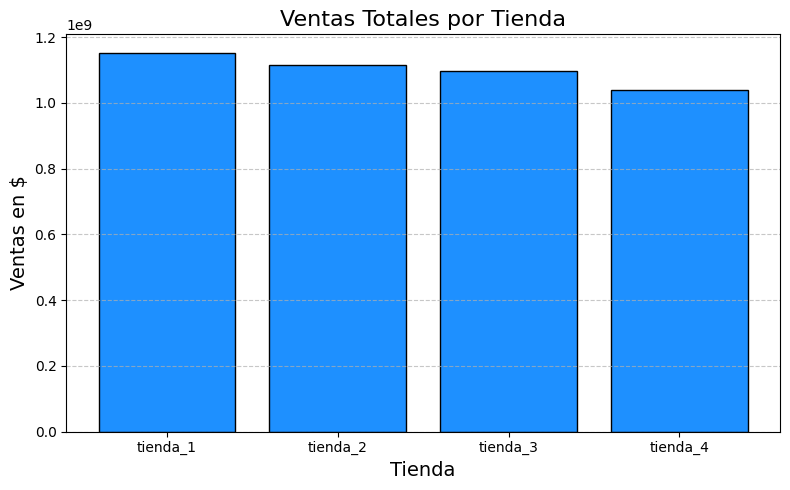

In [8]:
#Aqui vamos a considerar tres puntos :
#1.Ventas totales por tienda:
import matplotlib.pyplot as plt
def analizar_ventas_por_tienda(df,mostrar_grafico=True):

  ventas_por_tienda = df_total.groupby('tienda')['Precio'].sum().reset_index()
  display(ventas_por_tienda.style.set_caption("Ventas Totales por Tienda").format({'Precio':'${:,.2f}'}))

# Gráfico de barras con estilo
  if mostrar_grafico:
      plt.figure(figsize=(8,5))
      plt.bar(ventas_por_tienda['tienda'], ventas_por_tienda['Precio'], color='dodgerblue', edgecolor='black')
      plt.title('Ventas Totales por Tienda', fontsize=16)
      plt.xlabel('Tienda', fontsize=14)
      plt.ylabel('Ventas en $', fontsize=14)
      plt.grid(axis='y', linestyle='--', alpha=0.7)
      plt.tight_layout()
      plt.show()

  return ventas_por_tienda

ventas_por_tienda = analizar_ventas_por_tienda(df_total)


,count
tienda,
tienda_1,2359
tienda_2,2359
tienda_3,2359
tienda_4,2358


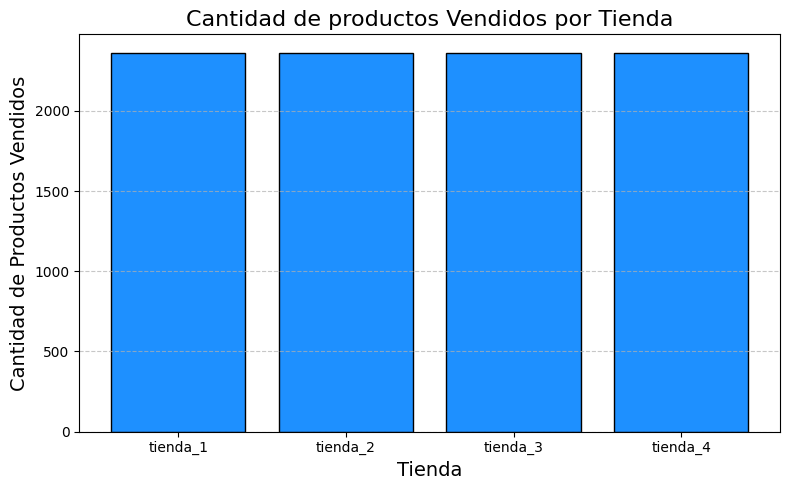

In [10]:
#2.- Cantidad de productos vendidos por cada tienda:
import matplotlib.pyplot as plt
# Cantidad de productos vendidos por tienda (conteo de filas)
def graficar_ventas_por_tienda(df):

    cantidad_por_tienda = df_total['tienda'].value_counts()
    display(cantidad_por_tienda)

    # Gráfico de barras
    plt.figure(figsize=(8,5))
    plt.bar(cantidad_por_tienda.index, cantidad_por_tienda.values, color='dodgerblue', edgecolor='black')
    plt.title('Cantidad de productos Vendidos por Tienda', fontsize=16)
    plt.xlabel('Tienda', fontsize=14)
    plt.ylabel('Cantidad de Productos Vendidos', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
# LLamamos a la funcion.
graficar_ventas_por_tienda(df_total)


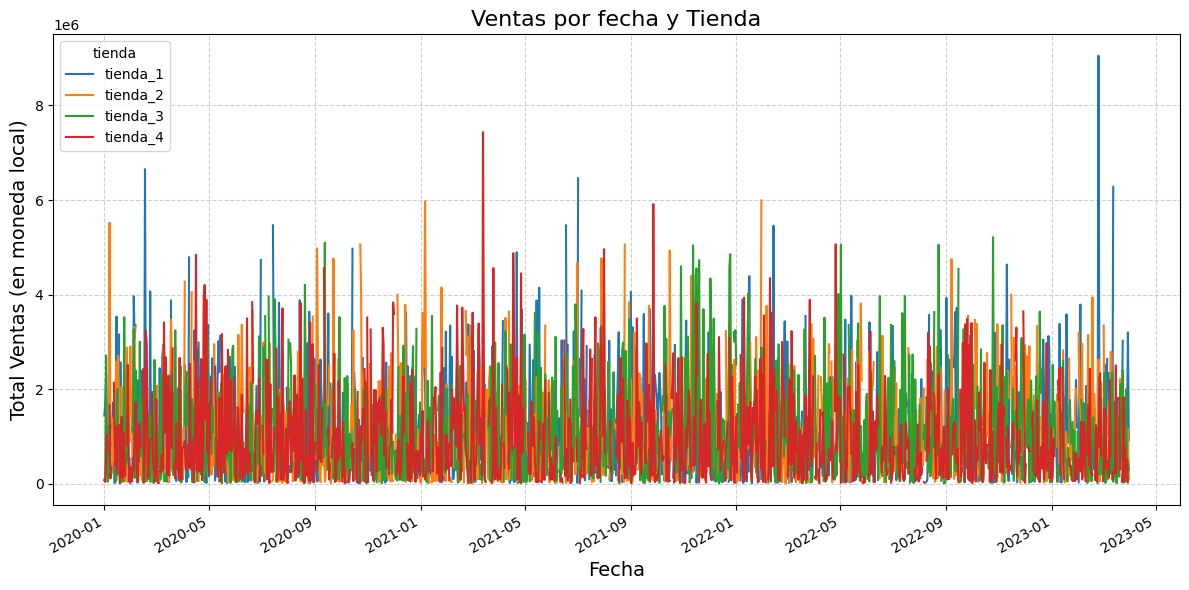

In [11]:
#3.- Ventas por fecha:
import matplotlib.pyplot as plt
def graficar_ventas_por_fecha(df):
    df_total['Fecha de Compra'] = pd.to_datetime(df_total['Fecha de Compra'],dayfirst=True)
    ventas_por_fecha = df_total.groupby(['Fecha de Compra','tienda'])['Precio'].sum().unstack()

    plt.figure(figsize=(12,6))
    ventas_por_fecha.plot(ax=plt.gca())
    plt.title('Ventas por fecha y Tienda', fontsize=16)
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Total Ventas (en moneda local)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

graficar_ventas_por_fecha(df_total)

# 2. Ventas por categoría

,Categoría del Producto,Precio
0,Artículos para el hogar,"$57,579,800.00"
1,Deportes y diversión,"$142,977,700.00"
2,Electrodomésticos,"$1,324,751,100.00"
3,Electrónicos,"$1,660,576,500.00"
4,Instrumentos musicales,"$348,772,600.00"
5,Juguetes,"$73,604,400.00"
6,Libros,"$37,696,100.00"
7,Muebles,"$757,661,000.00"


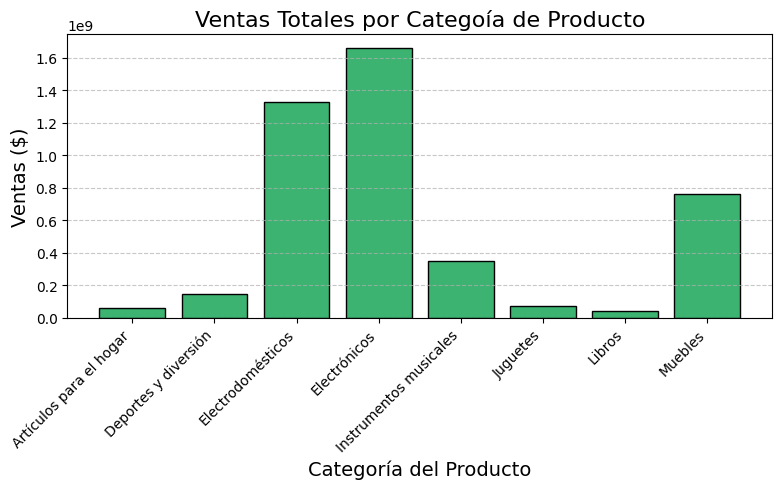

In [13]:
# Para tener un mejor entendimiento vamos a sumaremos el precio de cada grupo de categoria:
import matplotlib.pyplot as plt
def graficar_ventas_por_categoria(df):
      #Agrupar y sumar ventas por categoria
      ventas_por_categoria = df_total.groupby('Categoría del Producto')['Precio'].sum().reset_index()

      if ventas_por_categoria.empty:
          print("No existe datos de ventas por categoría para ser mostrados.")
          return
      # Mostra tablea con formato.
      display(ventas_por_categoria.style.set_caption("Ventas Totales por Categoría de Producto").format({'Precio':'${:,.2f}'}))

      #GRafico de barras ventas por categoria.
      plt.figure(figsize = (8,5))
      plt.bar(ventas_por_categoria['Categoría del Producto'],ventas_por_categoria['Precio'], color='mediumseagreen', edgecolor='black')
      plt.title('Ventas Totales por Categoía de Producto', fontsize=16)
      plt.xlabel('Categoría del Producto', fontsize=14)
      plt.ylabel('Ventas ($)', fontsize=14)
      plt.xticks(rotation=45, ha='right')
      plt.grid(axis='y',linestyle= '--', alpha=0.7)
      plt.tight_layout()
      plt.show()

graficar_ventas_por_categoria(df_total)



# 3. Calificación promedio de la tienda


,tienda,Calificación
0,tienda_1,3.976685
1,tienda_2,4.037304
2,tienda_3,4.048326
3,tienda_4,3.995759


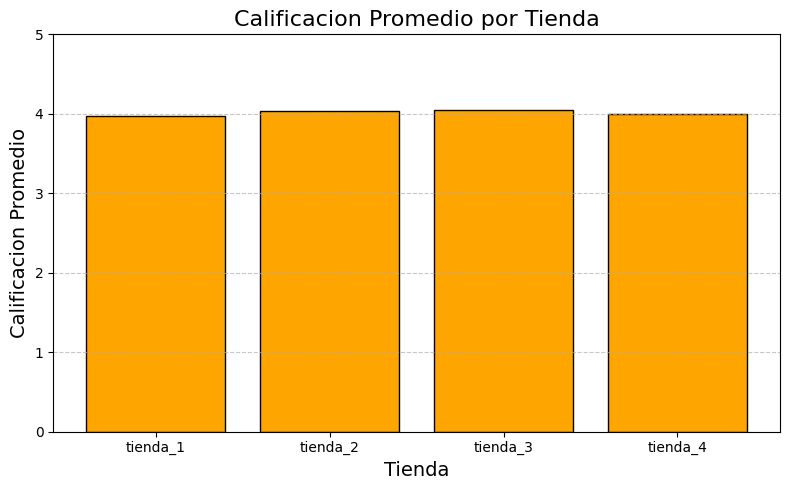

In [ ]:
#Esto nos dara la idea de como el cliente califica la tienda sacando los promedio.
import matplotlib.pyplot as plt
calificacion_promedio = df_total.groupby('tienda')['Calificación'].mean().reset_index()
display(calificacion_promedio)

# Tambien se muestra su respectivo grafico
plt.figure(figsize=(8,5))
plt.bar(calificacion_promedio['tienda'],calificacion_promedio['Calificación'],color='orange',edgecolor='black')
plt.title('Calificacion Promedio por Tienda',fontsize=16)
plt.xlabel('Tienda',fontsize=14)
plt.ylabel('Calificacion Promedio',fontsize=14)
plt.ylim(0,5)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()



# 4. Productos más y menos vendidos

Conteo Total de Productos Vendidos


,Producto,Cantidad Vendida
0,Mesa de noche,210
1,Carrito de control remoto,206
2,Microondas,206
3,Batería,203
4,Cama king,201
5,Secadora de ropa,200
6,Modelado predictivo,200
7,Set de ollas,200
8,Cama box,199
9,Bloques de construcción,199



Top 10 Productos Más Vendidos:


,Producto,Cantidad Vendida
0,Mesa de noche,210
1,Carrito de control remoto,206
2,Microondas,206
3,Batería,203
4,Cama king,201
5,Secadora de ropa,200
6,Modelado predictivo,200
7,Set de ollas,200
8,Cama box,199
9,Bloques de construcción,199



Top 10 Productos Menos Vendidos:


,Producto,Cantidad Vendida
41,Olla de presión,172
42,Smartwatch,172
43,Set de vasos,169
44,Sillón,168
45,Asistente virtual,167
46,Ciencia de datos con Python,166
47,Guitarra eléctrica,165
48,Mochila,163
49,Auriculares con micrófono,158
50,Celular ABXY,157


Producto,Cantidad Vendida
Mesa de noche,210
Carrito de control remoto,206
Microondas,206
Batería,203
Cama king,201
Secadora de ropa,200
Modelado predictivo,200
Set de ollas,200
Cama box,199
Bloques de construcción,199


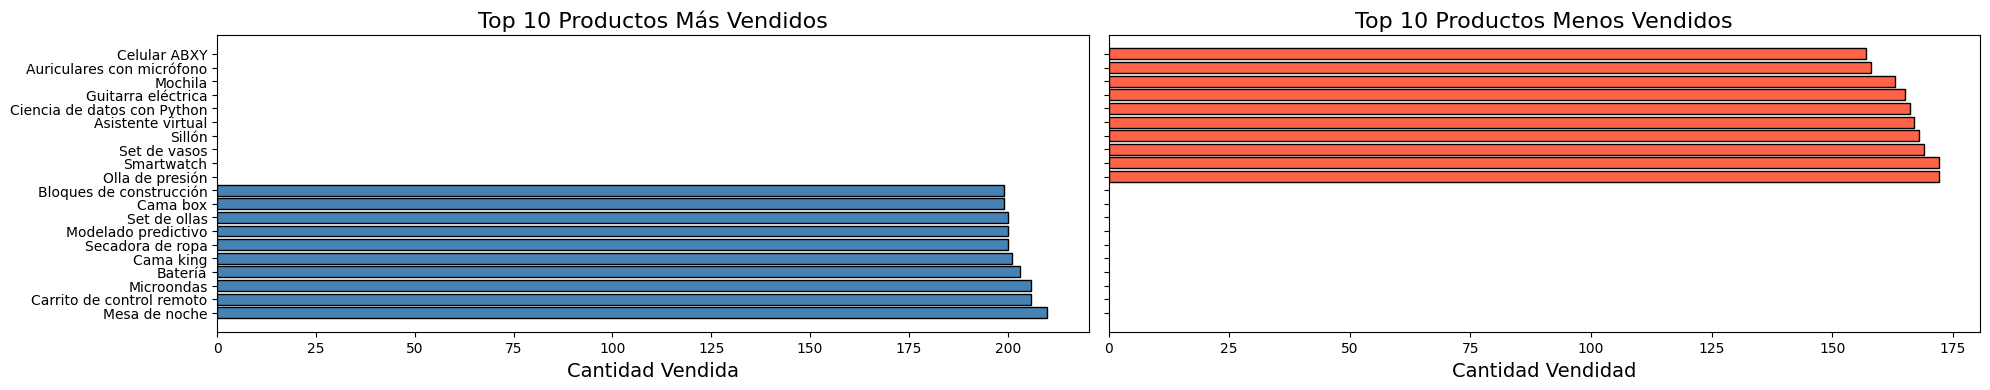

In [ ]:
# En esta seccion vamso a realizar un conteo de los productos asi tenemos una mejor vision, con lo cual podremos filtrar los productos mas vendidos,
# asi como tambien los menos vendidos y con sus graficas.

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Conteo productos vendidos.
products_sold = df_total['Producto'].value_counts().reset_index()
products_sold.columns = ['Producto','Cantidad Vendida']
print("Conteo Total de Productos Vendidos")
display(products_sold)

# Top 10 productos mas y menos vendidos.
top_10_masvendidos = products_sold.head(10)
top_10_menosvendidos = products_sold.tail(10)
print("\nTop 10 Productos Más Vendidos:")
display(top_10_masvendidos)
print("\nTop 10 Productos Menos Vendidos:")
display(top_10_menosvendidos)

from IPython.display import display, HTML

# Mostrar ambos DataFrames en paralelo
html_code = f"""
<div style="display: flex; justify-content: space-between;">
    <div style="margin-right: 70px;">
        <h3 style="color: steelblue;">Top 10 Productos Más Vendidos</h3>
        {top_10_masvendidos.to_html(index=False)}
    </div>
    <div>
        <h3 style="color: tomato;">Top 10 Productos Menos Vendidos</h3>
        {top_10_menosvendidos.to_html(index=False)}
    </div>
</div>
"""

display(HTML(html_code))


# Gradicas de ambos tops
fig, axes = plt.subplots(1,2, figsize=(20,9), sharey=True)

# top mas vendidos
axes[0].barh(top_10_masvendidos['Producto'],top_10_masvendidos['Cantidad Vendida'],color = 'steelblue' , edgecolor = 'black')
axes[0].set_title('Top 10 Productos Más Vendidos',fontsize=16)
axes[0].set_xlabel('Cantidad Vendida', fontsize=14)
axes[0].invert_yaxis()

#Top menos vendido
axes[1].barh(top_10_menosvendidos['Producto'],top_10_menosvendidos['Cantidad Vendida'], color = 'tomato', edgecolor = 'black')
axes[1].set_title('Top 10 Productos Menos Vendidos', fontsize = 16)
axes[1].set_xlabel('Cantidad Vendidad', fontsize = 14)
axes[1].invert_yaxis()

plt.tight_layout()
fig.subplots_adjust(top=0.4)
plt.show()



# 5. Envío promedio por tienda

Costo promedio de envío por tienda


,tienda,Costo de envío
0,tienda_1,"$26,018.61"
1,tienda_2,"$25,216.24"
2,tienda_3,"$24,805.68"
3,tienda_4,"$23,459.46"


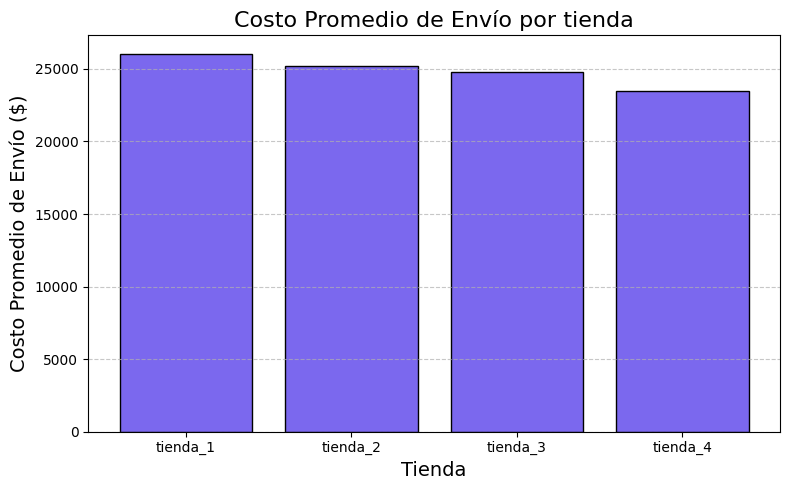

In [ ]:
# Calculo de costo promedio por tienda.
envio_promedio_por_tienda = df_total.groupby('tienda')['Costo de envío'].mean().reset_index()
print("Costo promedio de envío por tienda")
display(envio_promedio_por_tienda.style.set_caption("Costo Promedio de Envío por Tienda").format({'Costo de envío':'${:,.2f}'}))

#Graficamos tambien asi tenemos mayor observacion.
plt.figure(figsize=(8,5))
plt.bar(envio_promedio_por_tienda['tienda'],envio_promedio_por_tienda['Costo de envío'],color = 'mediumslateblue', edgecolor = 'black')
plt.title('Costo Promedio de Envío por tienda', fontsize=16)
plt.xlabel('Tienda', fontsize = 14)
plt.ylabel('Costo Promedio de Envío ($)', fontsize =  14)
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

